In [1]:
#Lab 3: data visualisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # plotting

In [41]:
data=pd.read_csv('test_data9.csv')
data.head()

,Id,ParentId,UUID,SomeString,SomeUrl,SomeEmail,SomeLat,SomeLon,SomeInt,SomeReal,SomeDate,SomeBoolean,SomeCountry,MixedStringNumber
0,1,62.0,123e4567-e89b-12d3-a456-426655440000,abcdef,http://www.google.com,foo@bar.com,19.569728,158.650752,5671.0,3684.472507,2018-05-31,True,AL,21
1,2,NaN,123e4567-e89b-12d3-a456-426655440000,NaN,https://www.kaggle.com,test1@test.com,NaN,-4.628926,NaN,6655.542889,2018-04-19,True,AL,NaN
2,3,45.0,123e4567-e89b-12d3-a456-426655440000,NaN,https://www.kaggle.com,foo@bar.com,25.760697,-178.298274,NaN,7603.611651,2018-05-10,True,AL,21
3,4,38.0,123e4567-e89b-12d3-a456-426655440000,abcdef,https://www.kaggle.com,test1@test.com,10.896313,-114.710326,NaN,8137.959125,2018-04-27,True,AL,NaN
4,5,NaN,123e4567-e89b-12d3-a456-426655440000,abcdef,https://www.kaggle.com,foo@bar.com,-44.326649,99.715664,NaN,8521.891842,2018-04-04,True,AL,0.4080873354


([<matplotlib.patches.Wedge object at 0x7fb96ccaf4d0>, <matplotlib.patches.Wedge object at 0x7fb96ccaf910>, <matplotlib.patches.Wedge object at 0x7fb96ccafed0>], [Text(0.1671220400870444, 1.0872305292426, 'foo@bar.com'), Text(-0.5167241134540698, -0.971079909469404, 'test1@test.com'), Text(1.0383124738755283, -0.36319031731928186, 'jeet.shah90@nmims.edu.in')])


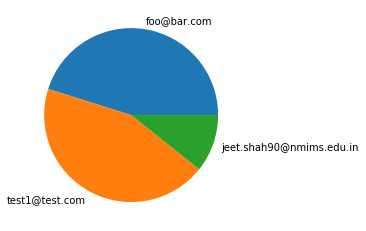

In [8]:
#PIE plot data visualisation
#cleaning out nan values from data
data['SomeEmail']=data['SomeEmail'].fillna('jeet.shah90@nmims.edu.in')
Emailslabel=data.SomeEmail.unique()
#print(Emailslabel)
totalEmails=data.SomeEmail.value_counts()
#print(type(totalEmails))
#getting the count values of each variable
slices=[totalEmails[0],totalEmails[1],totalEmails[2]]
print(plt.pie(slices, labels=Emailslabel))

([<matplotlib.patches.Wedge object at 0x7fb96cd65210>, <matplotlib.patches.Wedge object at 0x7fb96cd655d0>, <matplotlib.patches.Wedge object at 0x7fb96cd65d10>], [Text(-1.0872305292426, 0.1671220400870447, 'foo@bar.com'), Text(0.971079909469404, -0.5167241134540699, 'test1@test.com'), Text(0.42922492046824234, 1.2270965600347152, 'jeet.shah90@nmims.edu.in')])


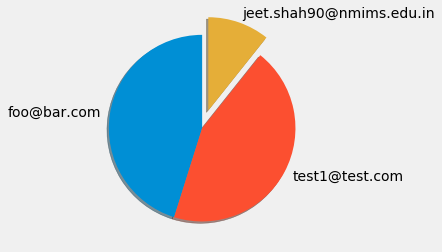

In [9]:
#pie plot with modifications
plt.style.use('fivethirtyeight')
explode=[0,0,0.2]
print(plt.pie(slices,labels=Emailslabel,explode=explode,shadow=True,startangle=90))

['foo@bar.com' 'test1@test.com' 'jeet.shah90@nmims.edu.in']


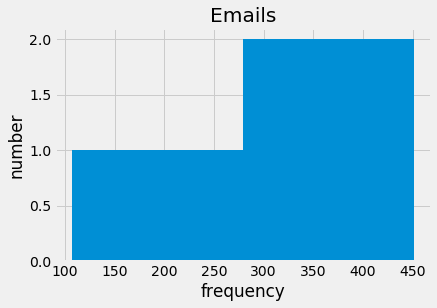

In [18]:
#plt histogram to plot frequency 
plt.hist(slices,bins=2)
print(Emailslabel)
plt.title('Emails')
plt.xlabel('frequency')
plt.ylabel('number')
plt.show()

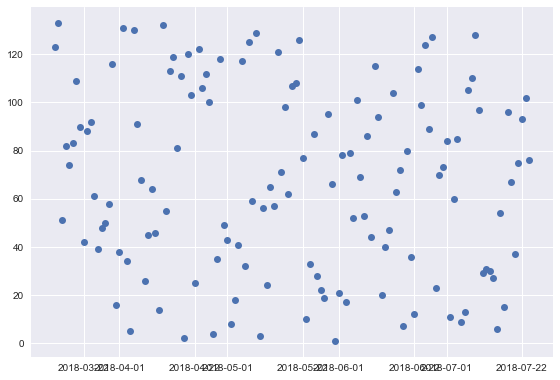

In [32]:
#printing datetime series with each ID and their corresponding date
import datetime
from matplotlib import dates as lab_dates
plt.style.use('seaborn')
strdate=data['SomeDate'][0]
#datetimeobj=datetime.datetime.strptime(strdate, "%Y-%m-%d")
data['SomeDate'] =  pd.to_datetime(data['SomeDate'], format='%Y-%m-%d')
plt.plot_date(data['SomeDate'],data['Id'])
plt.tight_layout()
plt.show()

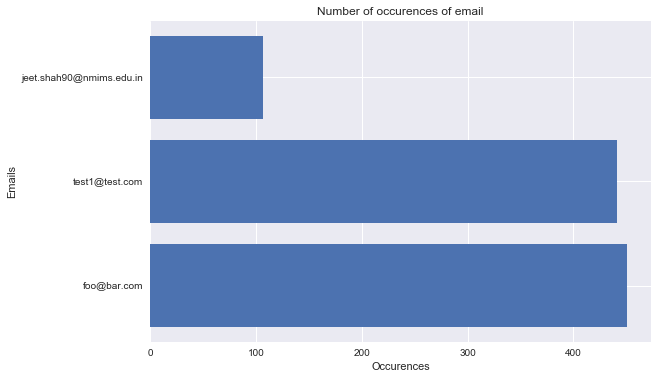

In [39]:
#Creating the bar chart 
plt.barh(Emailslabel,slices) 

#Adding the aesthetics
plt.title('Number of occurences of email')
plt.xlabel('Occurences')
plt.ylabel('Emails') 

#Show the plot
plt.show()

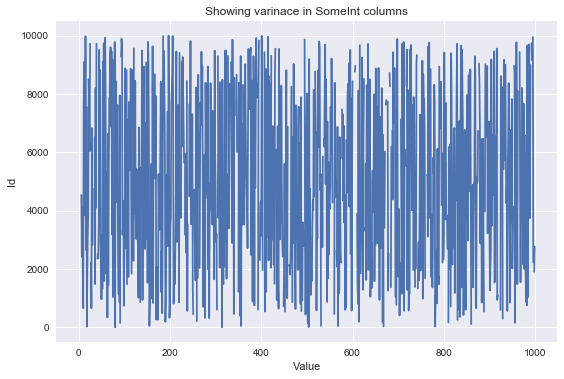

In [46]:
#Creating the dataset
data1=data.groupby('Id')['SomeInt'].sum().to_frame().reset_index()
#Creating the line chart
plt.plot(data['Id'], data['SomeInt']) 
#Adding the aesthetics
plt.title('Showing varinace in SomeInt columns')
plt.xlabel('Value')
plt.ylabel('Id') 
#Show the plot
plt.show()

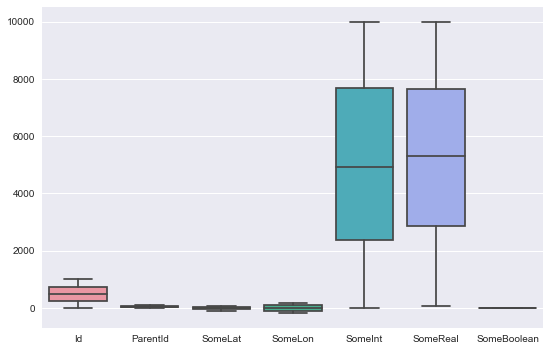

In [47]:
#printing boxplots for the columns
import seaborn as sns
sns.boxplot(data=data,showfliers=True)

In [49]:
#removing outliers from the boxplot
from matplotlib.cbook import boxplot_stats
data['SomeInt']=data['SomeInt'].dropna()
outliers = [y for stat in boxplot_stats(data['SomeInt']) for y in stat['fliers']]
print(outliers)
#as you can see there are no outliers to the data, hence they cannot be removed

[]
